In [44]:
import ast
import gc
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

%matplotlib inline

In [9]:
os.listdir("../data/raw")

['train_simplified']

In [11]:
RAW_DATA_DIR = '../data/raw'
TRAIN_SIMPLIFIED_DIR = os.path.join(RAW_DATA_DIR, 'train_simplified')

In [12]:
data_train = pd.read_csv(os.path.join(TRAIN_SIMPLIFIED_DIR, 'sleeping bag.csv'))

In [14]:
data_train.head(5)

,countrycode,drawing,key_id,recognized,timestamp,word
0,US,"[[[92, 91, 82, 69, 64, 56, 28, 15, 6, 0, 1, 18...",4745881255411712,True,2017-03-10 13:46:31.635970,sleeping bag
1,US,"[[[52, 22, 12, 5, 1, 0, 5, 26, 149, 184, 230, ...",4859794726846464,False,2017-03-04 17:08:46.745630,sleeping bag
2,AU,"[[[4, 3, 11, 22, 38, 63, 251, 255, 251, 252, 2...",4573190200229888,True,2017-03-17 06:36:27.083520,sleeping bag
3,BR,"[[[4, 183, 191, 202, 204, 201, 189, 10, 3, 0, ...",5103637015560192,True,2017-03-26 20:34:57.242880,sleeping bag
4,US,"[[[64, 67], [57, 114]], [[64, 91, 163], [57, 6...",6037379364159488,False,2017-03-01 01:39:06.642580,sleeping bag


In [36]:
words = data_train['word'].tolist()
drawings = [ast.literal_eval(pts) for pts in data_train[0:8]['drawing'].values] # python list

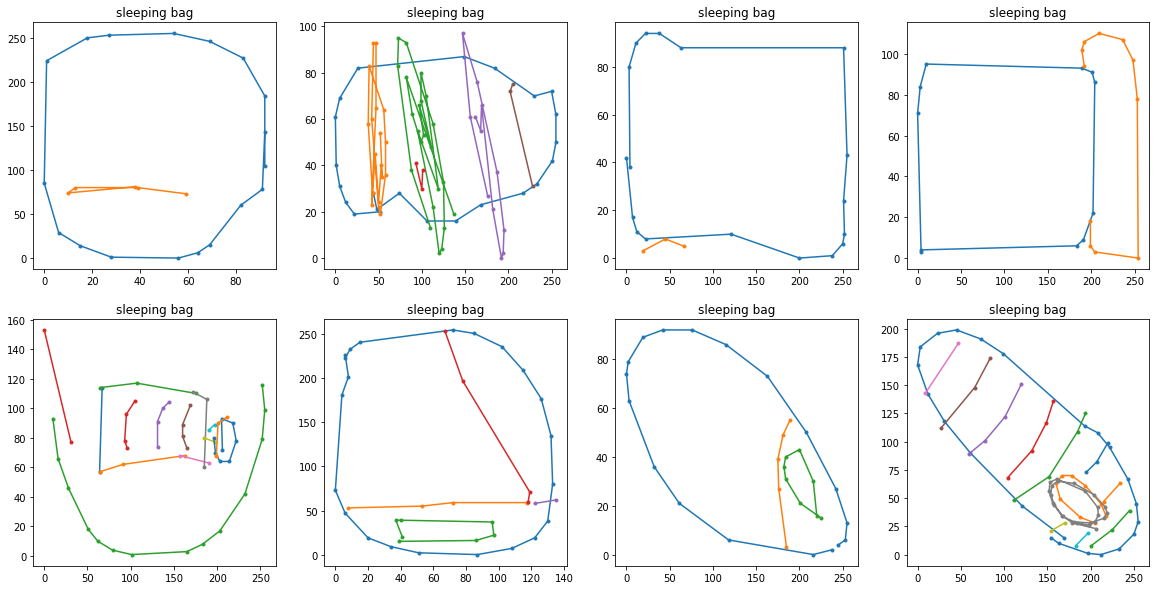

In [40]:
# https://goo.gl/1f1uad
plt.figure(figsize=(20, 10))
for i, drawing in enumerate(drawings):
    plt.subplot(2, 4, i+1)
    for x, y in drawing:
        plt.plot(x, y, marker='.')
        plt.title(words[i])

In [42]:
owls = pd.read_csv(os.path.join(TRAIN_SIMPLIFIED_DIR, 'owl.csv'))
owls = owls[owls.recognized]
owls['timestamp'] = pd.to_datetime(owls.timestamp)
owls = owls.sort_values(by='timestamp', ascending=False)[-100:]
owls['drawing'] = owls['drawing'].apply(ast.literal_eval)

owls.head()

,countrycode,drawing,key_id,recognized,timestamp,word
51970,ES,"[[[2, 0], [17, 74]], [[8, 32, 38], [21, 49, 68...",5786031599124480,True,2017-01-01 00:50:54.745600,owl
80453,CH,"[[[36, 40, 47, 53, 74], [99, 120, 135, 134, 89...",6291395033694208,True,2017-01-01 00:50:02.055500,owl
161146,FI,"[[[92, 80, 49, 35, 21, 6, 0, 0, 7, 27, 67, 106...",5746607960096768,True,2017-01-01 00:49:30.136290,owl
48933,DE,"[[[58, 46, 47, 56, 83, 96, 107, 114, 116, 97, ...",5170809880444928,True,2017-01-01 00:49:26.996180,owl
96639,AU,"[[[104, 60, 41, 29, 26, 37, 61, 97, 116, 127, ...",5156918278488064,True,2017-01-01 00:49:20.452400,owl


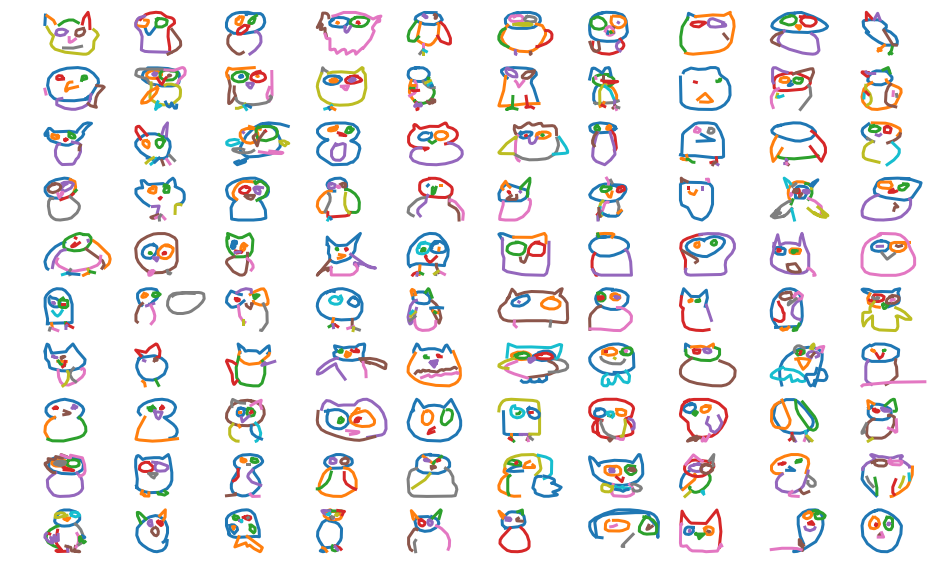

In [45]:
n = 10
fig, axs = plt.subplots(nrows=n, ncols=n, sharex=True, sharey=True, figsize=(16, 10))
for i, drawing in enumerate(owls.drawing):
    ax = axs[i // n, i % n]
    for x, y in drawing:
        ax.plot(x, -np.array(y), lw=3)
    ax.axis('off')
# fig.savefig('owls.png', dpi=200)
plt.show();